# Definition of the problem

#What Is Fake News?
There are two kinds of fake news:

Stories that aren't true. These are entirely invented stories designed to make people believe something false, to buy a certain product, or to visit a certain website.
Stories that have some truth, but aren't 100 percent accurate. For example, a journalist quotes only part of what a politician says, giving a false impression of their meaning. Again, this can be deliberate, to convince readers of a certain viewpoint, or it can be the result of an innocent mistake. Either way, it quickly attracts an audience and can become entrenched as an "urban myth."


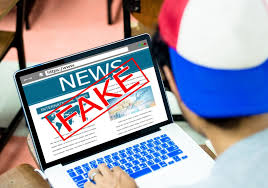

# Dataset

This data set consists of 40000 fake and real news. Our goal is to train our model to accurately predict whether a particular piece of news is real or fake. Fake and real news data are given in two separate data sets, with each data set consisting of approximately 20000 articles.

**Link Dataset**
https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

#Agenda:
* Loading and preparing data
* Importing libraries
* Visualize data and understand
* Building deep learning models[RNN-LSTM-GRU]

#Loading data from kaggle

In [ ]:
# import my kaggle api from my drive
import os 
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/kaggle api'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%mkdir /content/data
%cd /content/data

mkdir: cannot create directory ‘/content/data’: File exists
/content/data


In [ ]:
# %%capture --no-display
! kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset
! unzip /content/data/fake-and-real-news-dataset.zip

fake-and-real-news-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/data/fake-and-real-news-dataset.zip
replace Fake.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Fake.csv                
  inflating: True.csv                


#Import libraries

In [ ]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load('en_core_web_sm')

# nlp = spacy.load("en_core_web_lg")
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# true_data=pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
# fake_data=pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
true_data=pd.read_csv('/content/data/True.csv')
fake_data=pd.read_csv('/content/data/Fake.csv')

In [ ]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
# adding label column in data
true_data['label']=1 # 1 for real news data
fake_data['label']=0 # 0 for fake news data

In [ ]:
# merge two data frame in one data
data=pd.concat([true_data,fake_data])
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


#Visualize data and understand

Text(0.5, 1.0, 'fake news vs true news')

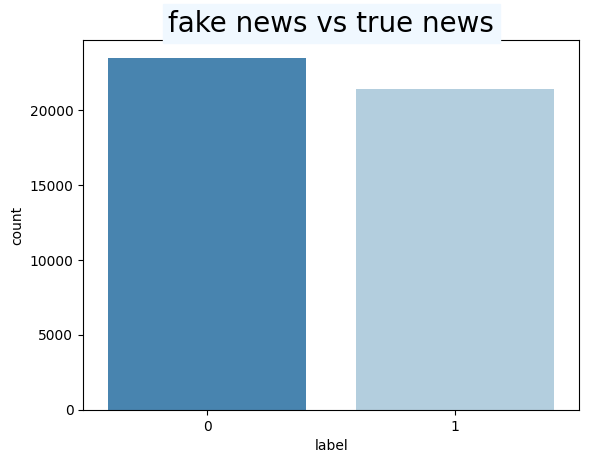

In [ ]:
sns.countplot(x='label',data=data,palette='Blues_r')
plt.title('fake news vs true news',fontsize='20',backgroundcolor='aliceblue')

**we note that data have a balance distribution between fake news and true news**

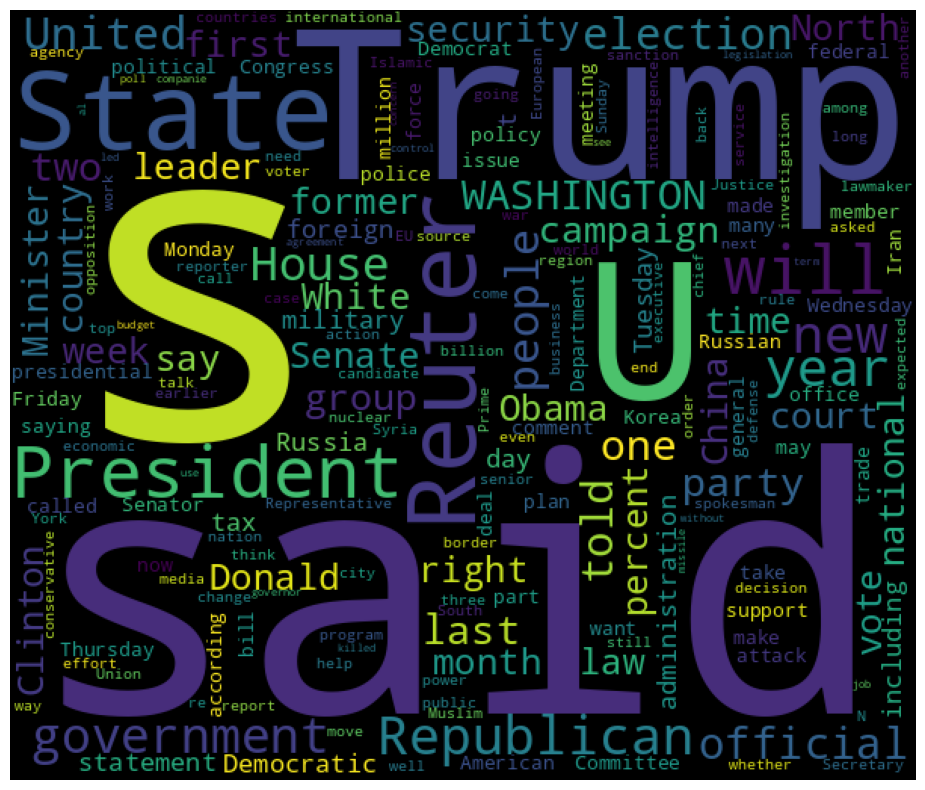

In [ ]:
# wordcloud for true news
true_text = " ".join(i for i in true_data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=600,height=510,stopwords=stopwords,collocations=False).generate(true_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

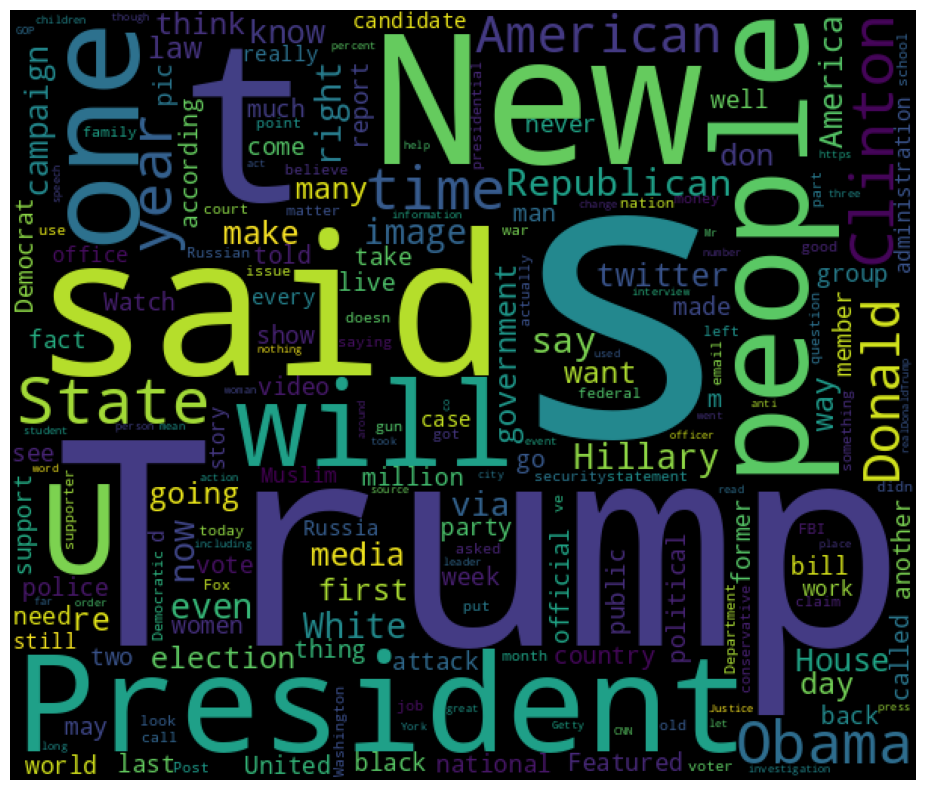

In [ ]:
# wordcloud for fake news
fake_text = " ".join(i for i in fake_data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=600,height=510,stopwords=stopwords,collocations=False).generate(fake_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [ ]:
#check if the data have null samples
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
#check if the data have duplicated samples
data.duplicated().sum()

209

In [ ]:
# delete duplicates samples
data.drop_duplicates(inplace=True)

In [ ]:
# value counts in subject news
data.subject.value_counts()

politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

[Text(0.5, 1.0, 'Subject frequencies ')]

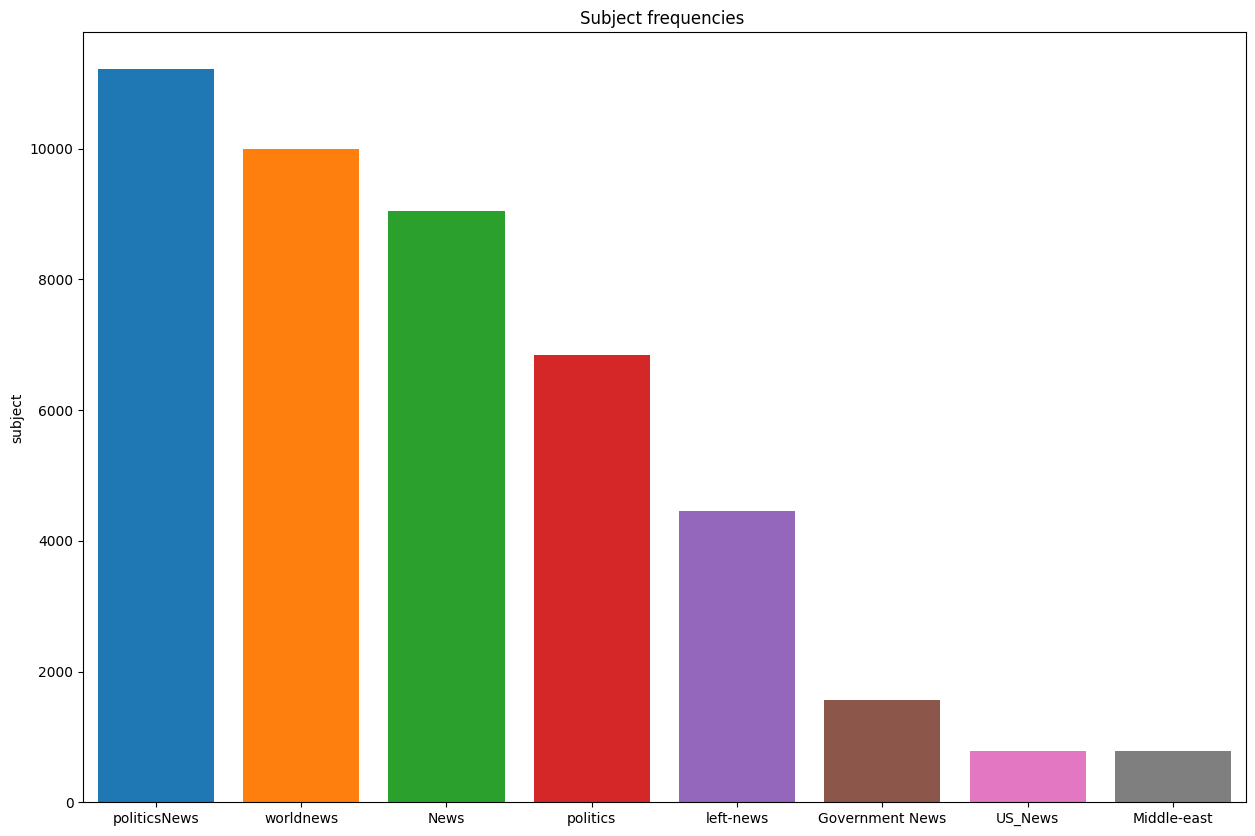

In [ ]:
# visualize subject news in barplot
plt.figure(figsize=[15,10],clear=True)
sns.barplot(x=data['subject'].value_counts().index,
            y=data['subject'].value_counts(),
            saturation=1).set(title='Subject frequencies ')

**we note that political News has more trending**

In [ ]:
# reset index to shuffle the data
data=data.sample(frac = 1,random_state=10000).reset_index(drop=True)
data.head()

,title,text,subject,date,label
0,Donald Trump’s Own Email Scandal Actually Bro...,This is hypocrisy of the highest order and pro...,News,"October 31, 2016",0
1,VETERAN WHO GAVE TRUMP His Purple Heart Explai...,"He asked me if I wanted it back and I said, ...",politics,"Aug 3, 2016",0
2,[VIDEO] OBAMA TELLS HOMETOWN KENYANS: “I’m A P...,"We re not sure what s funnier, the fact that h...",politics,"Jul 28, 2015",0
3,"WATCH: CIA Operative Resigns In Disgust, Torc...",The people who actually know what is at stake ...,News,"February 21, 2017",0
4,JUST IN: OBAMA APPOINTED JUDGE Presiding Over ...,"Now, a Clinton appointed judge who took Flynn ...",left-news,"Dec 7, 2017",0


In [ ]:
data=data.drop(labels=['title','subject','date'],axis=1)

In [ ]:
data.head()

,text,label
0,This is hypocrisy of the highest order and pro...,0
1,"He asked me if I wanted it back and I said, ...",0
2,"We re not sure what s funnier, the fact that h...",0
3,The people who actually know what is at stake ...,0
4,"Now, a Clinton appointed judge who took Flynn ...",0


# Pre-Processing

In [ ]:
# removing stopwords
data['cleaned_text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
# lemmatization by spacy

lemma = []
for text in nlp.pipe(data['cleaned_text'], batch_size=100, n_process=3):
    if text.has_annotation("DEP"):
        lemma.append([n.lemma_ for n in text])
    else:
        lemma.append(None)

        
data['lemma'] = lemma

In [ ]:
data

,text,label,cleaned_text,lemma
0,This is hypocrisy of the highest order and pro...,0,This hypocrisy highest order proves Donald Tru...,"[this, hypocrisy, high, order, prove, Donald, ..."
1,"He asked me if I wanted it back and I said, ...",0,"He asked I wanted back I said, no!' The vetera...","[he, ask, I, want, back, I, say, ,, no, !, ', ..."
2,"We re not sure what s funnier, the fact that h...",0,"We sure funnier, fact talks pretty good presid...","[we, sure, funny, ,, fact, talk, pretty, good,..."
3,The people who actually know what is at stake ...,0,The people actually know stake comes national ...,"[the, people, actually, know, stake, come, nat..."
4,"Now, a Clinton appointed judge who took Flynn ...",0,"Now, Clinton appointed judge took Flynn guilty...","[now, ,, Clinton, appoint, judge, take, Flynn,..."
...,...,...,...,...
44684,WASHINGTON (Reuters) - The heads of the U.S. a...,1,WASHINGTON (Reuters) - The heads U.S. agencies...,"[WASHINGTON, (, Reuters, ), -, the, head, U.S...."
44685,WASHINGTON (Reuters) - President Barack Obama ...,1,WASHINGTON (Reuters) - President Barack Obama ...,"[WASHINGTON, (, Reuters, ), -, President, Bara..."
44686,Republicans are trying so hard not to expose t...,0,Republicans trying hard expose racists truly a...,"[republican, try, hard, expose, racist, truly,..."
44687,Donald Trump is an incompetent commander-in-ch...,0,Donald Trump incompetent commander-in-chief pr...,"[Donald, Trump, incompetent, commander, -, in,..."


In [ ]:
# Lemmatized cleaned_text re-joined (list to cleaned_text)
data['cleaned_text'] = data['lemma'].apply(' '.join)

In [ ]:
# Split the data to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.cleaned_text,data.label,shuffle=True)

print ("Training set shapes:", x_train.shape, y_train.shape)
print ("Test set shapes:", x_test.shape, y_test.shape)

Training set shapes: (33516,) (33516,)
Test set shapes: (11173,) (11173,)


In [ ]:
# normlization data :
def normlize(data):
    normlized=[]
    for sample in data:
        sample=sample.lower() #lowercase all words
        sample=re.sub(r'(\w)\1+|(.)\1+',r'\1',sample) # remove duplicate_characters
        sample= re.sub(r'\d+','',sample) #remove numbers
        sample=re.sub(r'[^\w\s]',"",sample)#removing_punctuations
        sample=re.sub("\s\s+" , " ", sample)#removing multiple_spaces
        normlized.append(sample)
    return normlized

In [ ]:
# make normlization process in training and testing data
x_train=normlize(x_train)
x_test=normlize(x_test)

In [ ]:
max_vocab=10000
max_len=300 # maximum lenght of sentence
epochs = 10
embed_size = 128

In [ ]:
#Tokenizer the text to vectors
tokenizer=Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)

In [ ]:
# tokenize train and test data
x_train=tokenizer.texts_to_sequences(x_train)
x_test=tokenizer.texts_to_sequences(x_test)

In [ ]:
# padding the text to have the same length in the article
x_train=tf.keras.preprocessing.sequence.pad_sequences(x_train,padding='post',maxlen=max_len)
x_test=tf.keras.preprocessing.sequence.pad_sequences(x_test,padding='post',maxlen=max_len)

#Biulding RNN model

**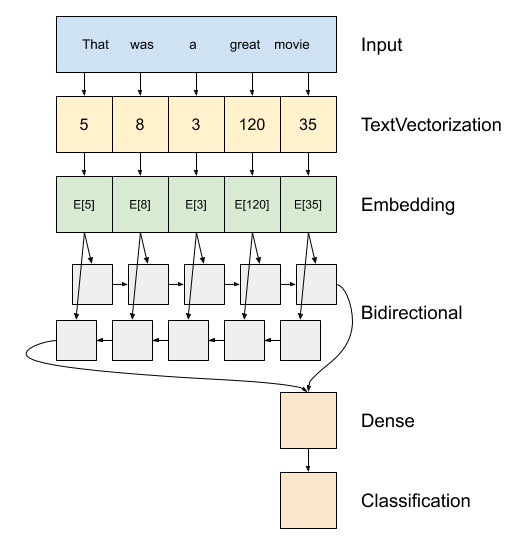

Above is a diagram of the model. 

1. This model can be build as a `tf.keras.Sequential`.

2. The first layer is the `encoder`, which converts the text to a sequence of token indices.

3. After the encoder is an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices to sequences of vectors. These vectors are trainable. After training (on enough data), words with similar meanings often have similar vectors.

  This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a `tf.keras.layers.Dense` layer.

4. A recurrent neural network (RNN) processes sequence input by iterating through the elements. RNNs pass the outputs from one timestep to their input on the next timestep.

  The `tf.keras.layers.Bidirectional` wrapper can also be used with an RNN layer. This propagates the input forward and backwards through the RNN layer and then concatenates the final output. 

  * The main advantage of a bidirectional RNN is that the signal from the beginning of the input doesn't need to be processed all the way through every timestep to affect the output.  

  * The main disadvantage of a bidirectional RNN is that you can't efficiently stream predictions as words are being added to the end.

5. After the RNN has converted the sequence to a single vector the two `layers.Dense` do some final processing, and convert from this vector representation to a single logit as the classification output. 


In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab,output_dim=embed_size,input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(32)),
    tf.keras.layers.BatchNormalization(), # Layer that normalizes inputs    
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 300, 128)         24704     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               10304     
 nal)                                                            
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                        

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy']
             )

we are going to use early stop,which stops when the validation loss no longer imorove

In [ ]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2, 
                                            restore_best_weights=False)

In [ ]:
history_VanillaRnn=model.fit(x_train,y_train,epochs= epochs,
                        validation_split=0.2,batch_size=30,shuffle=True,callbacks=[early_stop])

Epoch 1/10
894/894 [==============================] - 365s 403ms/step - loss: 0.3271 - accuracy: 0.8389 - val_loss: 0.0494 - val_accuracy: 0.9842
Epoch 2/10
894/894 [==============================] - 352s 394ms/step - loss: 0.0506 - accuracy: 0.9868 - val_loss: 0.0212 - val_accuracy: 0.9939
Epoch 3/10
894/894 [==============================] - 345s 386ms/step - loss: 0.0199 - accuracy: 0.9955 - val_loss: 0.0204 - val_accuracy: 0.9945
Epoch 4/10
894/894 [==============================] - 349s 391ms/step - loss: 0.0099 - accuracy: 0.9981 - val_loss: 0.0187 - val_accuracy: 0.9952
Epoch 5/10
894/894 [==============================] - 348s 389ms/step - loss: 0.0085 - accuracy: 0.9979 - val_loss: 0.0250 - val_accuracy: 0.9945
Epoch 6/10
894/894 [==============================] - 346s 387ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0296 - val_accuracy: 0.9921


Visualize VanillaRNN

In [ ]:
print('Acurracy model in training data',model.evaluate(x_train,y_train))
print('Acurracy model in testing data',model.evaluate(x_test,y_test))


1048/1048 [==============================] - 83s 79ms/step - loss: 0.0072 - accuracy: 0.9979
Acurracy model in training data [0.007177969440817833, 0.9978517889976501]
350/350 [==============================] - 28s 79ms/step - loss: 0.0285 - accuracy: 0.9927
Acurracy model in testing data [0.028520390391349792, 0.9926608800888062]


In [ ]:
# plot function to visualize model
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

(0.0, 0.3432523756753653)

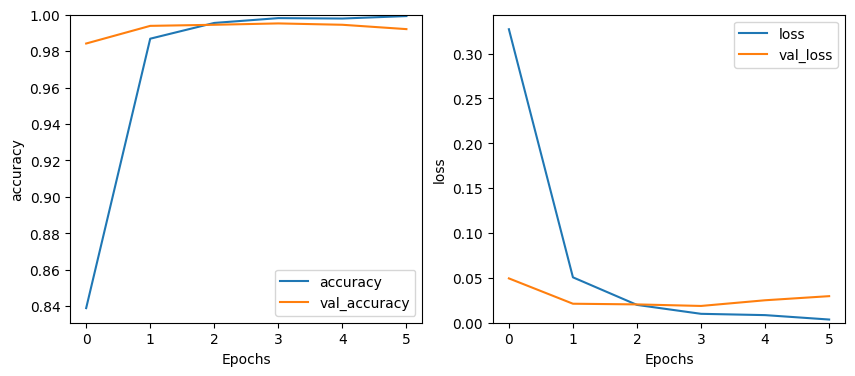

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_graphs(history_VanillaRnn, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_VanillaRnn, 'loss')
plt.ylim(0, None)

# LSTM Model

**LSTM**
is special kind of recurrent neural network that is capable of learning long term dependencies in data. This is achieved because the recurring module of the model has a combination of four layers interacting with each other.

**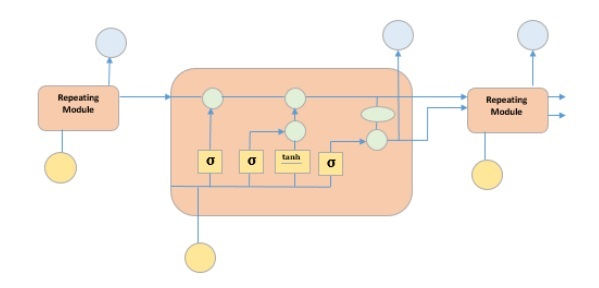**

In [ ]:
# clear the process of the weight in the previous model to prevent effects in next model
tf.keras.backend.clear_session()

In [ ]:
LSTM_model=tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab,output_dim=embed_size,input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
    
])

LSTM_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 128)          1280000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 300, 128)         98816     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
LSTM_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy']
             )


history_LSTM=LSTM_model.fit(x_train,y_train,epochs= epochs,
                        validation_split=0.2,batch_size=30,shuffle=True,callbacks=[early_stop])

Epoch 1/10
894/894 [==============================] - 734s 809ms/step - loss: 0.1734 - accuracy: 0.9004 - val_loss: 0.0248 - val_accuracy: 0.9916
Epoch 2/10
894/894 [==============================] - 708s 791ms/step - loss: 0.0182 - accuracy: 0.9954 - val_loss: 0.0154 - val_accuracy: 0.9949
Epoch 3/10
894/894 [==============================] - 710s 795ms/step - loss: 0.0070 - accuracy: 0.9988 - val_loss: 0.0189 - val_accuracy: 0.9954
Epoch 4/10
894/894 [==============================] - 717s 802ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0202 - val_accuracy: 0.9961


In [ ]:
loss_train,accuracy_train=LSTM_model.evaluate(x_train,y_train)
loss_test,accuracy_test=LSTM_model.evaluate(x_test,y_test)

In [ ]:
print('Results of LSTM model :')
print('In training data :Loss :', loss_train ,"  Accuracy: " ,accuracy_train)
print('In testing data : Loss : ',loss_test , "  Accuracy: ",accuracy_test)

Results of LSTM model :
In training data :Loss : 0.005097617860883474   Accuracy:  0.9990452527999878
In testing data : Loss :  0.02737807296216488   Accuracy:  0.9948089122772217


(0.0, 0.18185620463918895)

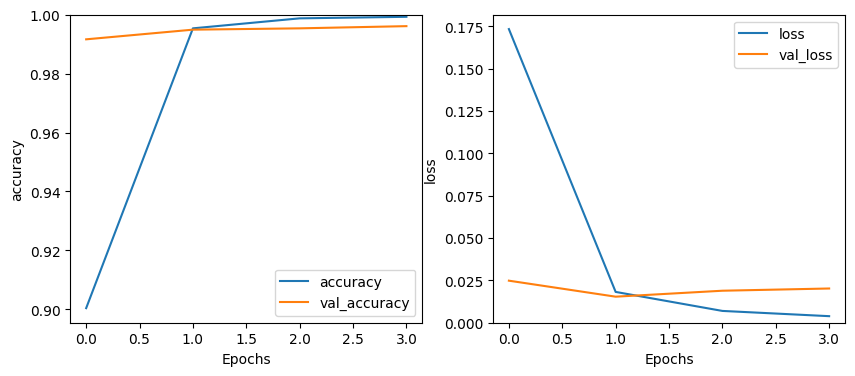

In [ ]:
# plot accuracy and loss for lstm model
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_graphs(history_LSTM, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_LSTM, 'loss')
plt.ylim(0, None)

# GRU Model

**The gated recurrent unit (GRU) is a variation of LSTM as both have design similarities, and in some cases, they produce similar results. GRU uses an update gate and reset gate to solve the vanishing gradient problem.These gates decide what information is important and pass it to the output. The gates can be trained to store information from long ago, without vanishing over time or removing irrelevant information.**

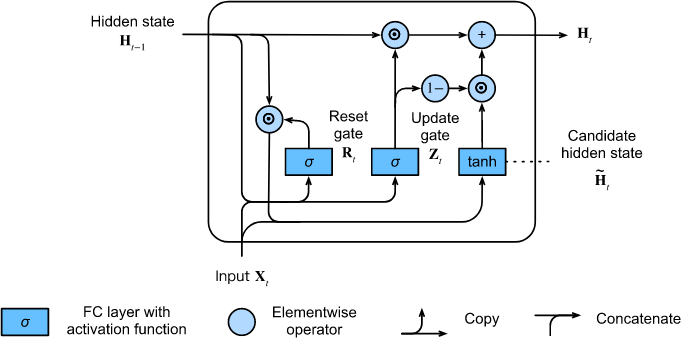

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
GRU_model=tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab,output_dim=embed_size,input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    # tf.keras.layers.BatchNormalization(), # Layer that normalizes inputs
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
    
])

GRU_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 300, 128)         74496     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               31104     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3

In [ ]:
GRU_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy']
             )


history_GRU=GRU_model.fit(x_train,y_train,epochs= epochs,
                        validation_split=0.2,batch_size=30,shuffle=True,callbacks=[early_stop])

Epoch 1/10
894/894 [==============================] - 723s 797ms/step - loss: 0.2078 - accuracy: 0.8710 - val_loss: 0.0191 - val_accuracy: 0.9911
Epoch 2/10
894/894 [==============================] - 692s 775ms/step - loss: 0.0379 - accuracy: 0.9901 - val_loss: 0.0499 - val_accuracy: 0.9867
Epoch 3/10
894/894 [==============================] - 701s 784ms/step - loss: 0.0178 - accuracy: 0.9959 - val_loss: 0.0151 - val_accuracy: 0.9960
Epoch 4/10
894/894 [==============================] - 694s 776ms/step - loss: 0.0089 - accuracy: 0.9979 - val_loss: 0.0282 - val_accuracy: 0.9936
Epoch 5/10
894/894 [==============================] - 708s 792ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.0167 - val_accuracy: 0.9960


In [ ]:
# %%capture --no-display
loss_train,accuracy_train=GRU_model.evaluate(x_train,y_train)
loss_test,accuracy_test=GRU_model.evaluate(x_test,y_test)

350/350 [==============================] - 53s 152ms/step - loss: 0.0237 - accuracy: 0.9951


In [ ]:
print('Results of GRU model :')
print('In training data :Loss :', loss_train ,"  Accuracy: " ,accuracy_train)
print('In testing data : Loss : ',loss_test , "  Accuracy: ",accuracy_test)

Results of GRU model :
In training data :Loss : 0.004690202418714762   Accuracy:  0.9988363981246948
In testing data : Loss :  0.023706277832388878   Accuracy:  0.9950774312019348


(0.0, 0.21783381171990185)

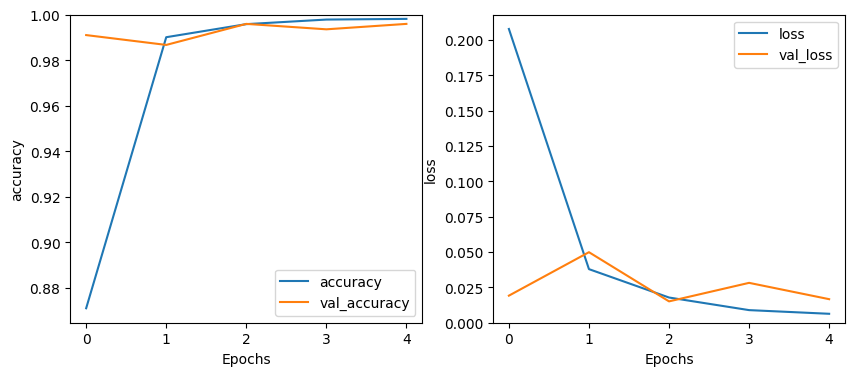

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_graphs(history_GRU, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_GRU, 'loss')
plt.ylim(0, None)